# 目的
ai4privacyのprivacy_mask列から、GPT4生成用のパーツを作り出す
- FIRST_AND_LAST_NAME
- ONLY_FIRST_NAME
- ONLY_LAST_NAME
- ONLY_LAST_NAME
など

In [1]:
import json
import polars as pl
import ast
import matplotlib.pyplot as plt

In [2]:
# Read JSONL file
with open("../data/ai4privacy/english_pii_43k.jsonl", "r") as f:
    data = [json.loads(line) for line in f]

# Convert to Polars DataFrame
df = pl.DataFrame(data)

In [3]:
for i in df["privacy_mask"][:200]:
    print(i)

{'[PHONEIMEI_1]': '06-184755-866851-3', '[JOBAREA_1]': 'Optimization'}
{'[FIRSTNAME_1]': 'Omer', '[VEHICLEVIN_1]': '78B5R2MVFAHJ48500'}
{'[FIRSTNAME_1]': 'Kattie', '[AGE_1]': '72', '[GENDER_1]': 'Intersex person', '[HEIGHT_1]': '158centimeters'}
{'[BUILDINGNUMBER_1]': '16356', '[MASKEDNUMBER_1]': '5890724654311332'}
{'[AGE_1]': '88', '[BUILDINGNUMBER_1]': '5862', '[PASSWORD_1]': 'Y2rWliOhf8Ir'}
{'[DOB_1]': '29/12/1957', '[IPV6_1]': 'edaf:fd8f:e1e8:cfec:8bab:1afd:6aad:550c'}
{'[GENDER_1]': 'Trans male', '[PASSWORD_1]': 'E5_N8G2xWM6D'}
{'[NEARBYGPSCOORDINATE_1]': '[-71.6702,-107.6572]', '[USERAGENT_1]': 'Mozilla/5.0 (Macintosh; PPC Mac OS X 10.7.5; rv:12.5) Gecko/20100101 Firefox/12.5.9'}
{'[FIRSTNAME_1]': 'Carleton', '[NEARBYGPSCOORDINATE_1]': '[-38.9302,113.5422]', '[PASSWORD_1]': 'yZqd7gHyZq91'}
{'[TIME_1]': '10:18 PM', '[JOBTITLE_1]': 'Human Group Coordinator', '[COUNTY_1]': 'Cleveland', '[EMAIL_1]': 'Emilie_Beatty53@hotmail.com', '[ACCOUNTNUMBER_1]': '63652332', '[PIN_1]': '8824', '

In [49]:
#
all_labels = []
for span_label in df["span_labels"]:
    for val in ast.literal_eval(span_label):
        all_labels.append(val[2])
        break

set(all_labels)

{'ACCOUNTNAME_1',
 'ACCOUNTNUMBER_1',
 'AGE_1',
 'BIC_1',
 'BITCOINADDRESS_1',
 'BUILDINGNUMBER_1',
 'CITY_1',
 'COMPANYNAME_1',
 'COUNTY_1',
 'CREDITCARDCVV_1',
 'CREDITCARDISSUER_1',
 'CREDITCARDNUMBER_1',
 'CURRENCYCODE_1',
 'CURRENCYNAME_1',
 'CURRENCYSYMBOL_1',
 'CURRENCY_1',
 'DATE_1',
 'DOB_1',
 'EMAIL_1',
 'EYECOLOR_1',
 'FIRSTNAME_1',
 'GENDER_1',
 'IBAN_1',
 'IPV4_1',
 'IPV6_1',
 'IP_1',
 'JOBAREA_1',
 'JOBTITLE_1',
 'JOBTYPE_1',
 'LASTNAME_1',
 'LITECOINADDRESS_1',
 'MAC_1',
 'MASKEDNUMBER_1',
 'MIDDLENAME_1',
 'NEARBYGPSCOORDINATE_1',
 'O',
 'ORDINALDIRECTION_1',
 'PASSWORD_1',
 'PHONEIMEI_1',
 'PHONENUMBER_1',
 'PIN_1',
 'PREFIX_1',
 'SECONDARYADDRESS_1',
 'SEX_1',
 'SSN_1',
 'STATE_1',
 'STREET_1',
 'TIME_1',
 'URL_1',
 'USERAGENT_1',
 'USERNAME_1',
 'VEHICLEVIN_1',
 'VEHICLEVRM_1',
 'ZIPCODE_1'}

In [ ]:
# 'FIRSTNAME_1',
#  'FIRSTNAME_2',
#  'FIRSTNAME_3',
#  'FIRSTNAME_4',
#  'FIRSTNAME_5',
# 'LASTNAME_1',
#  'LASTNAME_2',
#  'LASTNAME_3',
#  'LASTNAME_4',
# 'PHONEIMEI_1',
#  'PHONEIMEI_2',
#  'PHONEIMEI_3',
#  'PHONENUMBER_1',
#  'PHONENUMBER_2',
# 'USERNAME_1',
#  'USERNAME_2',
#  'USERNAME_3',
# 'EMAIL_1',
#  'EMAIL_2',
#  'EMAIL_3',

In [53]:
from tqdm.auto import tqdm

first_name = []
last_name = []
phone_number = []
email = []

for text, span_token in tqdm(
    zip(df["unmasked_text"], df["span_labels"]), total=len(df)
):
    span_token = ast.literal_eval(span_token)
    for start_span, end_span, token in span_token:
        if token in [f"FIRSTNAME_{i}" for i in range(1, 6)]:
            first_name.append(text[start_span:end_span])
        elif token in [f"LASTNAME_{i}" for i in range(1, 5)]:
            last_name.append(text[start_span:end_span])
        elif token in [f"PHONENUMBER_{i}" for i in range(1, 2)]:
            phone_number.append(text[start_span:end_span])
        elif token in [f"EMAIL_{i}" for i in range(1, 3)]:
            email.append(text[start_span:end_span])

  0%|          | 0/43501 [00:00<?, ?it/s]

100%|██████████| 43501/43501 [00:02<00:00, 18753.77it/s]


In [55]:
fi

['Murray',
 'Leuschke',
 'Feeney',
 'Johnson',
 'Kerluke',
 'Gulgowski',
 'Ward',
 'Bogan',
 'Hettinger',
 'Mertz',
 'Conroy',
 'Gottlieb',
 'Barrows',
 'Schuppe',
 'Fritsch',
 'Orn',
 'Anderson',
 'Wolff',
 'Mills',
 'Quitzon',
 'Stracke',
 'VonRueden',
 'Mosciski',
 'Mraz',
 'Frami',
 'Muller',
 'Blick-Bahringer',
 'Johns',
 'Cummerata',
 'Sipes',
 'Cummings',
 'Steuber',
 'Grady',
 'Hoppe',
 'Dooley',
 'Schaden',
 'Ward',
 'Strosin-Mraz',
 'Carter',
 'McLaughlin',
 'Homenick',
 'Kassulke',
 'Borer',
 'Cremin',
 'Balistreri',
 'Shanahan',
 'Reichel',
 'Ryan',
 'Cruickshank',
 'Cummings',
 'Dietrich',
 'Renner',
 'Hintz',
 'Mills',
 'Boyle',
 'Corkery',
 'Sipes',
 'Wolff',
 'Conroy',
 'Okuneva',
 'Hegmann',
 'Donnelly',
 'Zulauf',
 'Berge',
 'Brakus',
 'Mann',
 'McGlynn',
 'Dibbert',
 'Flatley',
 'Langworth',
 'Waters',
 'Runolfsdottir',
 'Fisher',
 'Ortiz',
 'Hoeger',
 'Hirthe',
 'Paucek',
 'Schiller',
 'Ebert',
 'Collins',
 'Boehm-Lynch',
 'Grant',
 'Abernathy',
 'Mosciski',
 'Reing

In [43]:
idx = 13
for label, token in zip(df["bio_labels"][idx], df["tokenised_text"][idx]):
    print(label, token)

B-PREFIX ms
I-PREFIX .
O north
O ,
O our
O office
O in
B-COUNTY essex
O confirmed
O your
O visit
O with
O health
O psychologist
O at
B-TIME 10
I-TIME :
I-TIME 02
I-TIME am
O .
O your
O file
O with
O id
B-PHONEIMEI 04
I-PHONEIMEI -
I-PHONEIMEI 55
I-PHONEIMEI ##86
I-PHONEIMEI ##19
I-PHONEIMEI -
I-PHONEIMEI 83
I-PHONEIMEI ##26
I-PHONEIMEI ##0
I-PHONEIMEI ##4
I-PHONEIMEI -
I-PHONEIMEI 8
O is
O updated
O .


In [33]:
df["unmasked_text"][0]

"A student's assessment was found on device bearing IMEI: 06-184755-866851-3. The document falls under the various topics discussed in our Optimization curriculum. Can you please collect it?"

Text(0, 0.5, 'Frequency')

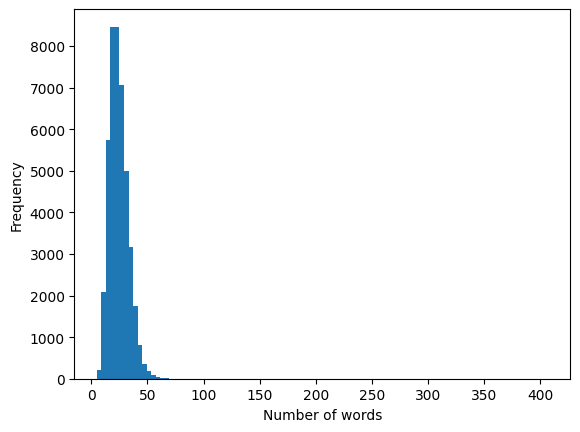

In [32]:
plt.hist(df["unmasked_text"].map_elements(lambda x: len(x.split())).to_list(), bins=100)
plt.xlabel("Number of words")
plt.ylabel("Frequency")
# 一文が短い？

In [ ]:
# tagの変更案
# B-FIRSTNAME > B-NAME_STUDENT
# B-FIRSTNAME, I-FIRSTNAME > 結合して、B-NAME_STUDENT
# B-LASTNAME > I-NAME_STUDENT
# B-LASTNAME, I-LASTNAME > 結合して、I-NAME_STUDENT

# B-STREET > B-STREET_ADDRESS
# I-STREET > I-STREET_ADDRESS
#